# Market Sentiments

In [1]:
%pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.9/245.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.9 MB/s eta 0:00:00
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 16.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sentiments = pd.read_excel("sentiments.xlsx", sheet_name='2020 - 2024')
sentiments['Date'] = sentiments['Date'].str.slice(0, 10)

## Time Analysis

In [37]:
sentiments['Date'] = pd.to_datetime(sentiments['Date'])

### Average Rating Per Day

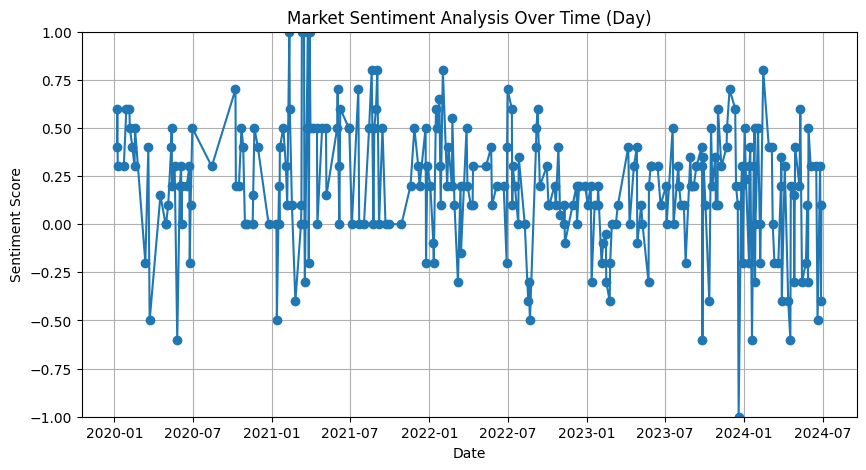

In [38]:
sentiments_day = sentiments.groupby('Date').agg({'Rating': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_day['Date'], sentiments_day['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Day)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()


### Average Rating Per Month

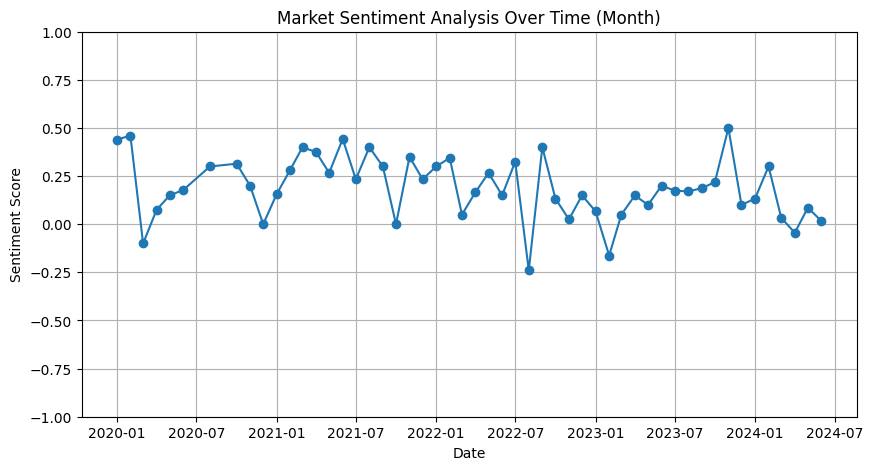

In [46]:
sentiments['Year Month'] = sentiments['Date'].dt.to_period('M')
sentiments_month = sentiments.groupby('Year Month').agg({'Rating': 'mean'}).reset_index()
sentiments_month['Year Month'] = sentiments_month['Year Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(sentiments_month['Year Month'], sentiments_month['Rating'], marker='o')

plt.title('Market Sentiment Analysis Over Time (Month)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)

plt.show()

### Average Rating Per Quarter

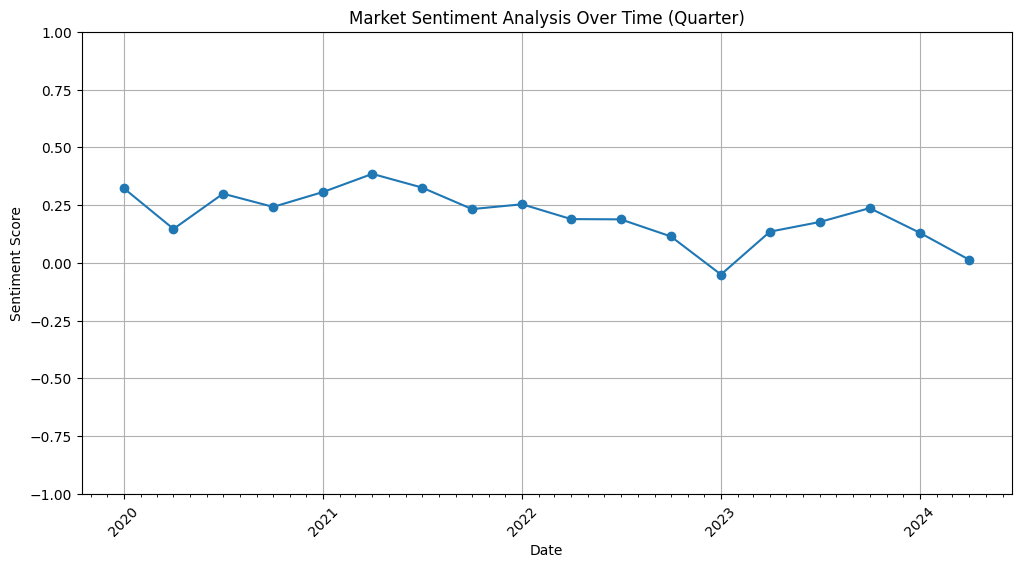

In [53]:
import matplotlib.dates as mdates

sentiments['Year Quarter'] = sentiments['Date'].dt.to_period('Q')
sentiments_quarter = sentiments.groupby('Year Quarter').agg({'Rating': 'mean'}).reset_index()
sentiments_quarter['Year Quarter'] = sentiments_quarter['Year Quarter'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(sentiments_quarter['Year Quarter'], sentiments_quarter['Rating'], marker='o')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.title('Market Sentiment Analysis Over Time (Quarter)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

### Forecasting

In [57]:
%pip install statsmodels scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 22.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/t3/4f3r77m96393n7bqz6cbqc980000gn/T/ipykernel_12262/3829572994.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


TypeError: unhashable type: 'numpy.ndarray'

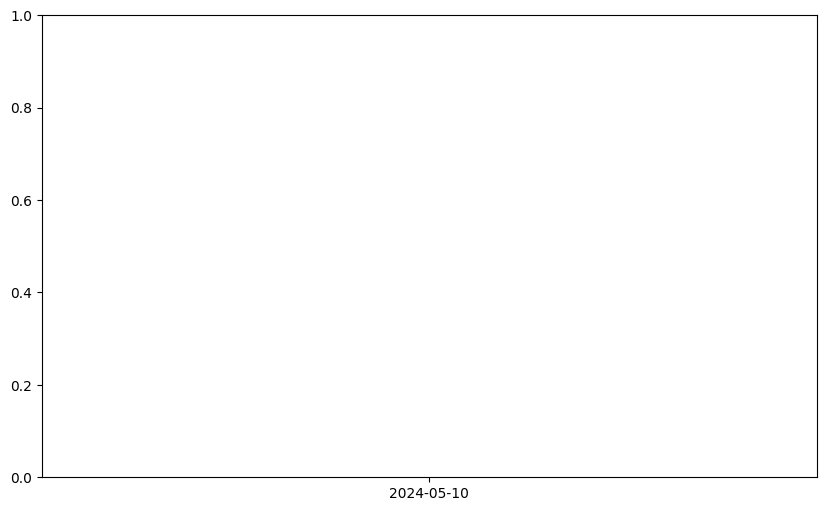

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_excel('sentiments.xlsx', parse_dates=['Date'], index_col='Date')

data.fillna(method='ffill', inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

result = adfuller(train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    train = train.diff().dropna()

p, d, q = 5, 1, 0  # parameters
model = ARIMA(train, order=(p, d, q))

model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

error = mean_squared_error(test, predictions)
print('Test MSE:', error)

plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data = pd.read_excel('sentiments.xlsx', usecols=['Date', 'Rating 1'], parse_dates=['Date'], index_col='Date')

data.index = pd.to_datetime(data.index)

data.fillna(method='ffill', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

result = adfuller(train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    train = train.diff().dropna()

p, d, q = 5, 1, 0  # parameters
model = ARIMA(train, order=(p, d, q))

model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))

error = mean_squared_error(test, predictions)
print('Test MSE:', error)

plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.show()

ValueError: time data "failed to " doesn't match format "%Y-%m-%d", at position 114. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.